# IPython2CWL

IPython2CWL is a that converts existing IPython Jupyter Notebooks to CWL Command Lines Tools. The tool requires to annotate the input and output variables. A simple example is described here. 

In [1]:
import pandas as pd
import matplotlib
from ipython2cwl.iotypes import CWLFilePathInput, CWLFilePathOutput

In [2]:
dataset: CWLFilePathInput = 'example.csv'

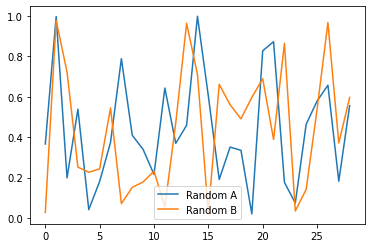

In [3]:
data = pd.read_csv(dataset)
# original data
fig = data.plot()

original_image: CWLFilePathOutput = 'original_data.png'
fig.figure.savefig(original_image)

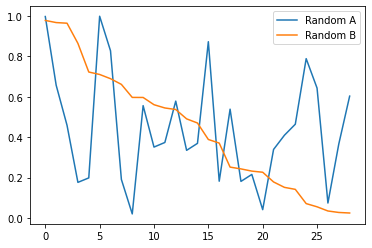

In [4]:
# transform data
data.sort_values(by='Random B', ascending=False, inplace=True, ignore_index=True)
fig = data.plot()

after_transform_data: CWLFilePathOutput = 'new_data.png'
fig.figure.savefig(after_transform_data)

In [2]:
# !jupyter-jn2cwl -o compiled_tool intro.ipynb

Traceback (most recent call last):
  File "/Users/dks/.pyenv/versions/3.6.10/bin/jupyter-jn2cwl", line 33, in <module>
    sys.exit(load_entry_point('ipython2cwl', 'console_scripts', 'jupyter-jn2cwl')())
  File "/Users/dks/Workspaces/IPython2CWL/ipython2cwl/ipython2cwl.py", line 32, in main
    converter = AnnotatedIPython2CWLToolConverter(script_code)
  File "/Users/dks/Workspaces/IPython2CWL/ipython2cwl/cwltoolextractor.py", line 133, in __init__
    self._tree = ast.fix_missing_locations(extractor.visit(ast.parse(self._code)))
  File "/Users/dks/.pyenv/versions/3.6.10/lib/python3.6/ast.py", line 35, in parse
    return compile(source, filename, mode, PyCF_ONLY_AST)
TypeError: compile() arg 1 must be a string, bytes or AST object


To compile the presented jupyter notebook to a CWL CommandLineTool run the following commands:
```sh
mkdir tool
jupyter-jn2cwl -o tool/tool.tar intro.ipynb
```
The tar file contains all the required files. Now we can extract them and build the docker image. 

```sh
cd tool
tar -xvf tool.tar
docker build . -t jn2cwl:latest .
```

To test the tool as a cwl we can execute the following command:
```sh
cwltool tool.cwl --dataset ../example.csv
```

`
INFO /Users/dks/.pyenv/versions/3.6.10/bin/cwltool 3.0.20200530110633
INFO Resolved 'tool.cwl' to 'file:///Users/dks/Workspaces/IPython2CWL/examples/compiled_tool/tool.cwl'
INFO [job tool.cwl] /private/tmp/docker_tmpq5oemdog$ docker \
    run \
    -i \
    --mount=type=bind,source=/private/tmp/docker_tmpq5oemdog,target=/mWoQja \
    --mount=type=bind,source=/private/tmp/docker_tmpombd7mgl,target=/tmp \
    --mount=type=bind,source=/Users/dks/Workspaces/IPython2CWL/examples/example.csv,target=/var/lib/cwl/stgf1649a28-7fa0-4a19-9b59-54d4839f363e/example.csv,readonly \
    --workdir=/mWoQja \
    --read-only=true \
    --net=none \
    --user=501:20 \
    --rm \
    --env=TMPDIR=/tmp \
    --env=HOME=/mWoQja \
    --cidfile=/private/tmp/docker_tmprs7uv65u/20200622183924-428346.cid \
    jn2cwl:latest \
    notebookTool \
    --dataset \
    /var/lib/cwl/stgf1649a28-7fa0-4a19-9b59-54d4839f363e/example.csv
INFO [job tool.cwl] Max memory used: 198MiB
INFO [job tool.cwl] completed success
{
    "after_transform_data": {
        "location": "file:///Users/dks/Workspaces/IPython2CWL/examples/compiled_tool/new_data.png",
        "basename": "new_data.png",
        "class": "File",
        "checksum": "sha1$d4d3a83c00d744931753c9aa93981d4a599ed391",
        "size": 40115,
        "path": "/Users/dks/Workspaces/IPython2CWL/examples/compiled_tool/new_data.png"
    },
    "original_image": {
        "location": "file:///Users/dks/Workspaces/IPython2CWL/examples/compiled_tool/original_data.png",
        "basename": "original_data.png",
        "class": "File",
        "checksum": "sha1$48966757640d677f3065b4e79ece68e5d4b324dd",
        "size": 52590,
        "path": "/Users/dks/Workspaces/IPython2CWL/examples/compiled_tool/original_data.png"
    }
}
INFO Final process status is success
`

Currently, in the presented version of the ipython2cwl the tool does not support magic commands but that feature will be added in soon!! for the reason if we write commands in the format "!ipython2cwl intro.ipynb" it will not work!